In [0]:
#Titanic Test <- Dataset de pasajeros del titanic

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Generar visualizacion
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split #Generar datos de entrenamiento
%matplotlib inline 
sns.set()

In [2]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')#Debido a la cantidad de datos lo haremos de esta forma
train_df.head() #0 -> muerto, 1 -> vivo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()
#No tenemos ningun valor nulo, lo que es bueno para el algoritmo de árbol de decision

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Distribución de los pasajeros')

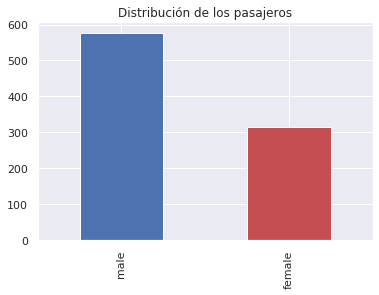

In [4]:
train_df.Sex.value_counts().plot(kind='bar',color=['b','r'])
plt.title('Distribución de los pasajeros')

In [0]:
"""

#Vamos a escoger datos para la predición -> Limpiarla

from sklearn import preprocessing

#Crearemos una etiqueta para trabajar datos
label_encoder = preprocessing.LabelEncoder() 

#Vamos a transformar datos
encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()
"""

"\n\n#Vamos a escoger datos para la predición -> Limpiarla\n\nfrom sklearn import preprocessing\n\n#Crearemos una etiqueta para trabajar datos\nlabel_encoder = preprocessing.LabelEncoder() \n\n#Vamos a transformar datos\nencoder_sex = label_encoder.fit_transform(train_df['Sex'])\ntrain_df.head()\n"

In [0]:
#Vamos a quitar los datos nulos -> Limpiar datos

#Los espacios vacios fillna los llenaremos con la media debido a que es una medida de tendencia 
#central lo cual no afecta a datos atípicos
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

#Llenaremos estos datos debido a que en Sout Hampton fue donde más personas se unieron al viaje -> S
train_df['Embarked'] = train_df['Embarked'].fillna('S')


In [0]:
#Borraremos los datos que no necesitamos
#Lo que queremos es saber quienes sobrevivieron por eso lo omitiremos
train_predictors = train_df.drop(['PassengerId','Survived', 'Name','Ticket', 'Cabin'], axis = 1)
#axis para indicar en la fila que se encuentra

#Tomar datos categoricos -> Etiquetas que usaremos para aprender y posteriormente asignar
#Recorremos la información si cumplimos las siguientes condiciones
#Datos unicos y deben ser menores a 10
#
categorical_cols = [cname for cname in train_predictors.columns if
                        train_predictors[cname].nunique()<10 and
                        train_predictors[cname].dtype == 'object'
                    
                    ]


In [0]:
#Variables numéricas, sóólo usaremos las que cumplan con la condicióón 

numerical_cols = [cname for cname in train_predictors.columns if
                  train_predictors[cname].dtype in ['int64','float64']
                  ]

In [0]:
my_cols = categorical_cols + numerical_cols

#Sustituiremos los datos con lo previo, de esta forma ya tenemos el train con data limpia
train_predictors = train_predictors[my_cols]

In [0]:
#De pandas usaremos dummy data para crear data con el fin de entrenar
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [10]:
#Obtener clases tras entrenamiento

train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
#Entrenamiento del Árbol
#División de los datosnon-null

y_target = train_df['Survived'].values #Lo que vamos a predecir
x_features_one = dummy_encoded_train_predictors.values #Los datos previos


In [0]:
#Hacemos la división de los datos para no generar un sobreajuste

#No confundir los datos para el aprendizaje que los datos para el entrenamiento
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one,y_target,test_size = .25,random_state=1)

In [0]:
#Vamos a entrenar al modelo
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one,y_target)

In [14]:
#Validar que tan bien lo hemos entrenado
tree_one_accuracy = round(tree_one.score(x_features_one,y_target),4) #Para redondear dato
print('Precision: ', (tree_one_accuracy))


Precision:  0.9798


Recapitulación:

1) Limpiamos datos
2) Hicimos aprender el modelo
3) Entrenamos el modelo
4) Vimos tanto la precisión como el modelo listo

Separamos los datos en dos csv porque es una buena práctica

Los datos suelen separarse en 3:
Train y Test -> Se hace cuando realices el test_split
Validation -> Datos guardados para la última prueba de los modelos

In [15]:
#Visualizar el árbol de decisión

from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
#Visualización
tree.export_graphviz(tree_one,out_file=out)

#Generamos el arbol
graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanicTree.png')

True

In [0]:
"""
Analizamos el árbol
-> Cada nodo son los diferentes caminos que ha generado para que 
-> Dicho de otra forma, X signifique todos los valores que ha aprendido

NOTA:
1 = Verdadero - Vivió
0 = Falso - Murió
"""